In [149]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import  least_squares
from utils import *


np.random.seed(43)

# Fitting the fluorescent intensity data by a Hill function

> In this notebook, we will see how we can use the __Least square__ package from the __scipy.optimize__ to fit on a synthesis dataset.
> Remember that in this case, the family of all Hill function is our __hypothesis space__. So, we need to select a function by determining _activation coefficient_, $K$, and _Hill coefficient_, $n$.

> In the follwoing cell, we first plot the Hill function for different parameters. Notice the effect of changing $K$ and $n$ on the resulting plots.

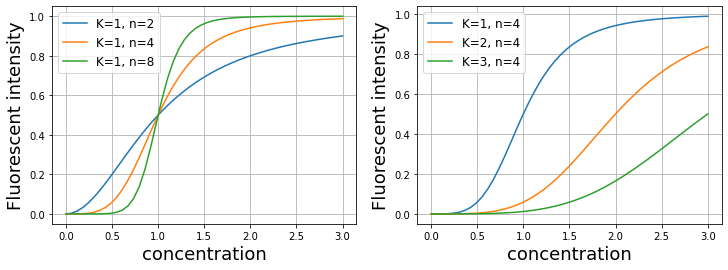

In [118]:
def Hill(x, K, n):
    """Hill function for gene expression rate
    
    Arguments:
    
       x: concentration
       K: activation coefficient
       n: Hill coefficient
       
    Return: float or ndarray
       The fluorescent intensity
    """
    return 1.0/(1.0 + (K/(x + 1e-20))**n )

def plot_Hill(ax, xs, Ks, ns):
    for K, n in zip(Ks, ns):
        ax.plot(xs, Hill(xs, K, n), label=f"K={K}, n={n}")        
    plot_Hill_general(ax)
    
xs = np.linspace(0,3)
_ = plt.figure(figsize=(12,4))
ax = plt.subplot(121)
plot_Hill(ax, xs, [1, 1, 1], [2, 4, 8])
ax = plt.subplot(122)
plot_Hill(ax, xs, [1, 2, 3], [4, 4, 4])
plt.show()
        

> We plot the same dataset that we used in class

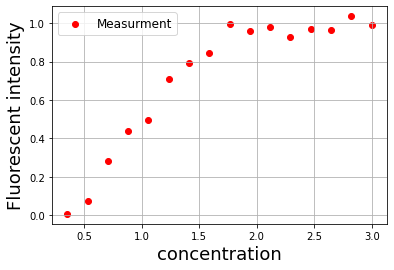

In [119]:
xs = np.linspace(0.0, 3, num=18)[2:]
ys = Hill(xs, 1.0, 4) + np.random.normal(0.0, .04, xs.shape)

_ = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.scatter(xs, ys, c='r', marker='o', label="Measurment")   
plot_Hill_general(ax)
plt.show()

> Next, we divide the data (xs, ys) to _train_ and _test_ sets.

In [122]:
x_train, y_train, x_test, y_test = train_test(xs, ys, train_size=12)

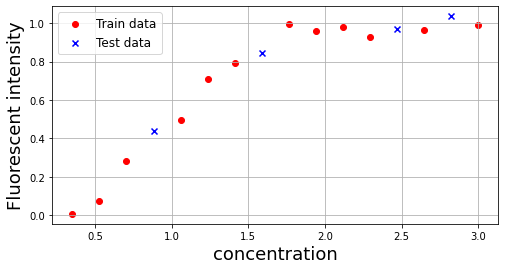

In [123]:
_ = plt.figure(figsize=(8,4))
ax = plt.gca()
ax.scatter(x_train, y_train, c='r', marker='o', label="Train data")   
ax.scatter(x_test, y_test, c='b', marker='x', label="Test data")   
plot_Hill_general(ax)
plt.show()

> Remember to select a Hill function, the algorithem must search the __parametes__ using __data__.
> To do it, we can create a function that its first argument is $K$ and $n$, while the remainings are x and y. > The function calculates the deviation by subtracting the observed _y_ from its estimated _Hill(x, K, n)_.  

In [146]:
def deviation(coefficients, xs, ys):
    K, n = coefficients
    return ys - Hill(xs, K, n)


> __scipy.optimize__ library impliments the least square, in  __least_squares__ function. It takes the deviation function, initial guess, and arguments. In our case, we use [K=1, n=1] as initial guess, and x_train and y_train as arguments. Recall that the __Data__ is the argument and parameters our uknown.

> The estimated $K$ and $n$ are returen in the output of the __least_squares__ function.

In [147]:
result = least_squares(deviation, [1, 1], args=(x_train, y_train))
estimated_K, estimated_n = result.x

# Practice 1:

print the __result__ variable to see its content. Where can we find more information about __least_squares__ function?

In [ ]:
# Practice 1





# Practice 2:

Find the $L2$ deviations in their sum for both train and test dataset.

In [148]:
#train_epsilons = deviation((estimated_K, estimated_n), x_train, y_train)
#train_L2 = np.sum([epsilon**2 for epsilon in train_epsilons])
#test_epsilons = deviation((estimated_K, estimated_n), x_test, y_test)
#test_L2 = np.sum([epsilon**2 for epsilon in test_epsilons])

> Finally, we plot the estimated function, using the parameters reslted from __least_squares__.

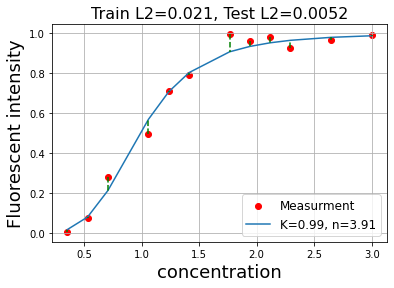

In [145]:
_ = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.scatter(x_train, y_train, c='r', marker='o', label="Measurment") 
ax.plot(x_train, 
        Hill(x_train, estimated_K, estimated_n), 
        label=f"K={estimated_K:.2f}, n={estimated_n:.2f}")
plt.title(f"Train L2={train_L2:.3f}, Test L2={test_L2:.4f}", fontsize=16)
for x,y in zip(x_train, y_train):
    ax.plot([x,x], [y, Hill(x, estimated_K, estimated_n)], 'g--')
plot_Hill_general(ax)
plt.show()